<div class="alert alert-block alert-info"><b>IAB303</b> - Data Analytics for Business Insight</div>

# Introduction to TOWS


### Why?

* Data Analytics is NOT the ultimate objective!
* Data Analytics SHOULD support business and organisational planning
* Data Analytics SHOULD support business strategy to achieve their objectives


#### Business and organisational planning

* [Business Model Canvas](https://miro.com/app/board/o9J_k0A8-0U=/?fromEmbed=1)


#### Business Strategy

* [Our Favorite Business Strategy Frameworks](https://www.smestrategy.net/blog/business-strategy-frameworks-for-strategic-planning)
    - Porter's 5 Forces
    - PESTLE
    - Value Chain Analysis
    - Balanced Score Card
    - SWOT

### TOWS

The same areas as SWOT (Strengths, Weaknesses, Opportunities, Threats), but with actions...

In [ ]:
from IPython.display import IFrame 
IFrame('https://www.youtube.com/embed/UySPb3bACQY',width=560,height=315)

### TOWS with the Data Analytics Cycle

* What business concerns are related to each of the 4 areas?
    - Strengths
    - Weaknesses
    - Opportunities
    - Threats


#### Internal data [Strengths and Weaknesses]

* How might a Data Analytics cycle focusing on *internal* data be able to help with strengths and weaknesses?
* What kind of data, analysis, visualisations would be useful for this cycle?
* What insights would we expect?

#### External data [Opportunities and Threats]

* How might a Data Analytics cycle focusing on *external* data be able to help with opportunities and threats?
* What kind of data, analysis, visualisations would be useful for this cycle?
* What insights would we expect?

#### Insights and TOWS

* How do we bring the internal DA together with the external DA?
    - Focus on insights
    - Ideas for action from combined insights
        * Strengths and Opportunities (SO)
        * Weaknesses and Opportunities (WO)
        * Strengths and Threats (ST)
        * Weaknesses and Threats (WT)

* What does the DA tell us about potential strategy for the business?


---

# TOWS Analysis Example

*IMPORTANT: This is an example that uses data analysis from week 4 tutorial.*

## Analysis 1 - Internal data

Amazon Movies revenue and subscribers by regions





<Axes: xlabel='Years'>

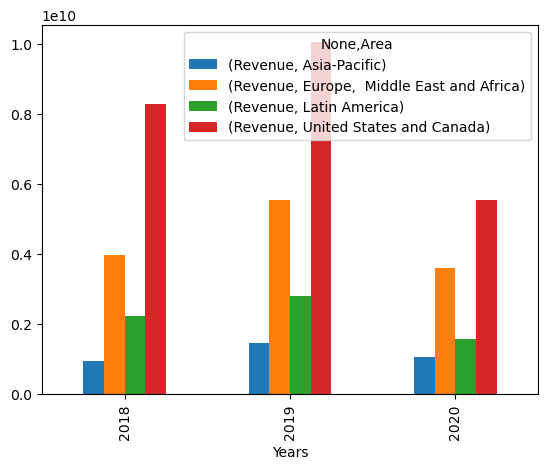

In [1]:
import pandas as pd

# Analysis of the internal data
df = pd.read_csv("data/DataAmazonMoviesRevenue2020.csv")
df["Quarter"] = df["Years"].apply(lambda x: x.split("-")[0])
df["Years"] = df["Years"].apply(lambda x: x.split("-")[1]).astype("int")
years_df = df[["Area", "Years", "Revenue"]].groupby(["Years", "Area"]).sum()

# Visualise the data
years_df.unstack().plot(kind="bar")

### Strengths

* North America is the biggest market
* Europe seems to have been the lowest market decline


### Weaknesses

* Revenue has declined in all regions
* Nort America has dramatically declined


### Why Weaknesses are significant?

* Although North America is still the biggest market, its revenue is declining making other regions becoming important
* The company needs to view its position in relevant regions like Europe and Latin America

## Analysis 2 - External data

Amazon Movies reviews were already analysed inweek 4 tutorial. Here's a recap...

In [2]:
import re

with open('data/amazon-movies-reviews.txt', 'r') as file:
    text = file.read()

text_lines = []

for line in text.split("\n\n"):
    text_lines.append(line.split("\n"))

# Create a new dataframe that will store the extracted data
reviews_df = pd.DataFrame(columns=(["ProductId", "Score", "Region", "Summary"]))

# Find that patterns to extract the productId, score and summary
for paragraph in text_lines:
    review = {}
    for line in paragraph:
        match_id = re.match(r"^product[-|/]product[I|i][D|d][\s:|:]", line)
        if (match_id):
            id = re.split(r":\s", line)
            review["ProductId"] = id[1]
        match_score = re.match(r"^review[-|/]score[\s:|:]", line)
        if (match_score):
            score = re.split(r":\s", line)
            review["Score"] = score[1]
        match_region = re.match(r"^review/region:", line)
        if (match_region):
            region = re.split(r":\s", line)
            review["Region"] = region[1]
        match_summary = re.match(r"^review/summary:", line)
        if (match_summary):
            summary = re.split(r":\s", line)
            review["Summary"] = summary[1]
    reviews_df = reviews_df.append(review, ignore_index=True)

reviews_df["Score"] = reviews_df["Score"].astype("float")

# Group by movie and regions to see the scores
movie_region_df = reviews_df[["ProductId", "Region", "Score"]].groupby(["ProductId", "Region"]).mean()
movie_region_df

/tmp/ipykernel_17454/2877228275.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  reviews_df = reviews_df.append(review, ignore_index=True)
/tmp/ipykernel_17454/2877228275.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  reviews_df = reviews_df.append(review, ignore_index=True)
/tmp/ipykernel_17454/2877228275.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  reviews_df = reviews_df.append(review, ignore_index=True)
/tmp/ipykernel_17454/2877228275.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  reviews_df = reviews_df.append(review, ignore_index=True)
/tmp/ipykernel_17454/2877228275.py:34: FutureWarning: The frame.append m

Score
ProductId  Region                 
B00004CQT3 Europe         5.000000
           Latin America  3.500000
           North America  5.000000
B00004CQT4 Europe         5.000000
           Latin America  4.000000
           North America  4.500000
B000063W1R Europe         4.809524
           Latin America  3.636364
           North America  4.937500
B00006HAXW Europe         5.000000
           Latin America  4.500000
           North America  5.000000
B003AI2VGA Europe         3.000000
           Latin America  2.000000
           North America  4.000000
B003ZG3GAM Europe         5.000000
B004BH1TN0 Europe         5.000000
           Latin America  3.666667
           North America  4.750000
B006JIUN2W North America  5.000000
B0071AD95K Europe         5.000000
           Latin America  4.666667
           North America  5.000000
B0078V2LCY Latin America  3.000000
           North America  4.000000

<Axes: title={'center': 'Regions scores'}, xlabel='ProductId'>

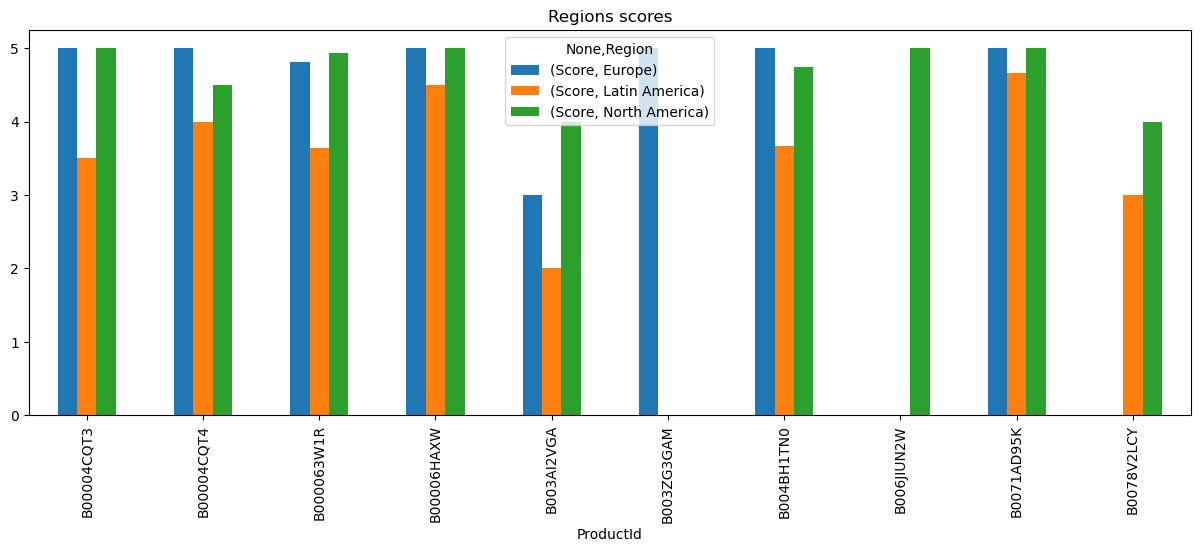

In [3]:
# Unstack the movies-regions data to have a better visualisation
movie_region_df.sort_values(by="Score", ascending=False).unstack().plot(kind="bar", title="Regions scores", figsize=(15,5))

#### Some insights

* Latin America has the region with the lowest review scores from critics
* North American and Europe has similar review scores


### Threats

* Competitors can take advantage of the lowest score reviews in Latin America to enter into the market


### Opportunities

* European market can be targeted to increase revenue as the score reviews are as high as North America
* North American market remains the best score reviews


## TOWS

1. Strengths and Opportunities
* Opportunity to increase our prescense in the European market

2. Strengths and Threats
* Improving the service to the Latin American market might attract subscribers



3. Weaknesses and Opportunities
* The reduction in the North American market can be regained as the reviews scores are still high

4. Weaknesses and Threats
* A potential loss of the Latin American market

### Actionable recommendations for the business...

 - add to the catalog movies that might be of interest to the European market
 - review the reasons the Latin American market review scores are low, subtitles? dubbing?
 - deals for the North American market to recover the share